In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load data with adjusted cortical thickness values included (output of previous script)

df = pd.read_csv('abide_adjusted_data_20190719.csv')
df.head()

,sub_id,site_id,file_id,dx_group,age_at_scan,sex,handedness_category,fiq,handedness_recode,handedness_L,...,adj_R_cuneus,adj_R_inferior_temporal,adj_R_insula,adj_R_isthmus_cingulate,adj_R_medial_orbitofrontal,adj_R_parahippocampal,adj_R_pars_orbitalis,adj_R_posterior_cingulate,adj_R_rostral_anterior_cingulate,adj_R_transverse_temporal
0,50003,PITT,Pitt_0050003,1,24.45,1,R,124.0,R,0,...,0.651836,0.249722,-0.356801,-0.042540,-0.036765,0.349021,-2.538960,0.058276,0.217937,0.497114
1,50004,PITT,Pitt_0050004,1,19.09,1,R,113.0,R,0,...,0.494346,0.881163,2.531340,0.847348,0.320809,1.027279,0.324330,0.368321,0.874192,1.220500
2,50005,PITT,Pitt_0050005,1,13.73,0,R,119.0,R,0,...,-1.927089,-0.723424,-0.821587,0.335794,-1.267576,-0.875677,-0.720126,0.318178,-0.578904,-1.141011
3,50006,PITT,Pitt_0050006,1,13.37,1,L,109.0,L,1,...,1.368964,-0.557595,0.350163,0.852746,-0.803458,0.823570,0.849661,1.117966,1.189567,0.899484
4,50007,PITT,Pitt_0050007,1,17.78,1,R,110.0,R,0,...,0.355681,-0.961496,-1.129568,-1.106398,0.376543,-2.119157,-0.401116,-0.395603,-0.393189,-1.334273


In [5]:
# adjusted rois (the features we're using)

adj_roi_list =  ['adj_L_entorhinal','adj_L_fusiform','adj_L_lateral_occipital','adj_L_superior_temporal',
                 'adj_L_middle_temporal','adj_L_rostral_middle_frontal','adj_L_pars_triangularis',
                 'adj_L_superior_frontal','adj_R_entorhinal','adj_R_fusiform','adj_R_middle_temporal',
                 'adj_R_rostral_middle_frontal','adj_R_pars_triangularis','adj_R_superior_frontal',
                 'adj_R_caudal_middle_frontal','adj_R_cuneus','adj_R_inferior_temporal','adj_R_insula',
                 'adj_R_isthmus_cingulate','adj_R_medial_orbitofrontal','adj_R_parahippocampal',
                 'adj_R_pars_orbitalis','adj_R_posterior_cingulate','adj_R_rostral_anterior_cingulate',
                 'adj_R_transverse_temporal']

In [6]:
# unadjusted rois (just in case)

roi_list = ['L_entorhinal', 'L_fusiform','L_lateral_occipital','L_superior_temporal','L_middle_temporal',
            'L_rostral_middle_frontal','L_pars_triangularis','L_superior_frontal','R_entorhinal','R_fusiform',
            'R_middle_temporal','R_rostral_middle_frontal','R_pars_triangularis','R_superior_frontal',
            'R_caudal_middle_frontal','R_cuneus','R_inferior_temporal','R_insula','R_isthmus_cingulate',
            'R_medial_orbitofrontal','R_parahippocampal','R_pars_orbitalis','R_posterior_cingulate',
            'R_rostral_anterior_cingulate','R_transverse_temporal']

$~$

**I. Initial algorithm selection:**

In [7]:
# split dataset into our training and testing datasets
# we are using all 25 ROIs as features in each model

from sklearn.model_selection import train_test_split

X = df[adj_roi_list] 
y = df['dx_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [8]:
# create an empty dataframe to store the results of each model

algorithm_results = pd.DataFrame(columns = ['Algorithm', 'Accuracy score', 'AUC'])

In [9]:
algorithm_results.head()

,Algorithm,Accuracy score,AUC


$~$

In [10]:
# Model 1: Naive Bayes with all 25 adjusted ROIs as features

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_class_nb = nb_model.predict(X_test)

nb_accuracy = metrics.accuracy_score(y_test, y_pred_class_nb)
nb_auc = metrics.roc_auc_score(y_test, y_pred_class_nb)

algorithm_results.loc[len(algorithm_results)] = ['Naive Bayes', nb_accuracy, nb_auc]

In [11]:
# Model 2: SVM with all 25 adjusted ROIs as features

from sklearn import svm

svm_model = svm.SVC(gamma = 'auto') 
svm_model.fit(X_train, y_train)

y_pred_class_svm = svm_model.predict(X_test)

svm_accuracy = metrics.accuracy_score(y_test, y_pred_class_svm)
svm_auc = metrics.roc_auc_score(y_test, y_pred_class_svm)

algorithm_results.loc[len(algorithm_results)] = ['SVM', svm_accuracy, svm_auc]

In [12]:
# Model 3: kNN with all 25 adjusted ROIs as features

from sklearn.neighbors import KNeighborsClassifier

kNN_model = KNeighborsClassifier(n_neighbors = 5)
kNN_model.fit(X_train, y_train)

y_pred_class_kNN = kNN_model.predict(X_test)

kNN_accuracy = metrics.accuracy_score(y_test, y_pred_class_kNN)
kNN_auc = metrics.roc_auc_score(y_test, y_pred_class_kNN)

algorithm_results.loc[len(algorithm_results)] = ['kNN', kNN_accuracy, kNN_auc]

In [13]:
# Model 4: random forest with all 25 adjusted ROIs as features

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 25, random_state = 1)
rf_model.fit(X_train, y_train)

y_pred_class_rf = rf_model.predict(X_test)

rf_accuracy = metrics.accuracy_score(y_test, y_pred_class_rf)
rf_auc = metrics.roc_auc_score(y_test, y_pred_class_rf)

algorithm_results.loc[len(algorithm_results)] = ['Random forest', rf_accuracy, rf_auc]

In [14]:
algorithm_results

,Algorithm,Accuracy score,AUC
0,Naive Bayes,0.531401,0.521578
1,SVM,0.584541,0.582850
2,kNN,0.555556,0.551723
3,Random forest,0.521739,0.523217


With adjusted cortical thickness values in all 25 ROIs as predictors, SVM appears to be the best performing algorithm of the four, with the highest accuracy and area under the ROC curve. 

$~$

**II. Dimension reduction:**  

We can attempt to improve the fit of the SVM model by:   
(1) excluding features with low variance  
(2) excluding features that are highly correlated, and thus may be collinear or redundant  
(3) excluding features that are not significantly associated with the outcome, and/or  
(4) reducing the number of features with recursive feature elimination 

In [15]:
# (1) check for features with low variance

df[adj_roi_list].var()

adj_L_entorhinal                    0.979691
adj_L_fusiform                      0.979691
adj_L_lateral_occipital             0.979691
adj_L_superior_temporal             0.979691
adj_L_middle_temporal               0.979691
adj_L_rostral_middle_frontal        0.979691
adj_L_pars_triangularis             0.979691
adj_L_superior_frontal              0.979691
adj_R_entorhinal                    0.979691
adj_R_fusiform                      0.979691
adj_R_middle_temporal               0.979691
adj_R_rostral_middle_frontal        0.979691
adj_R_pars_triangularis             0.979691
adj_R_superior_frontal              0.979691
adj_R_caudal_middle_frontal         0.979691
adj_R_cuneus                        0.979691
adj_R_inferior_temporal             0.979691
adj_R_insula                        0.979691
adj_R_isthmus_cingulate             0.979691
adj_R_medial_orbitofrontal          0.979691
adj_R_parahippocampal               0.979691
adj_R_pars_orbitalis                0.979691
adj_R_post

All of the features have the same variance (~ 1) because we are working with the adjusted cortical thickness data, i.e., the residuals from our fitted linear regression models which were standardized to have a mean of 0 and standard deviation of 1 (and thus a variance of 1 also)

$~$

In [16]:
# (2) check for high correlations

corrs = df[adj_roi_list].corr()
corrs.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,adj_L_entorhinal,adj_L_fusiform,adj_L_lateral_occipital,adj_L_superior_temporal,adj_L_middle_temporal,adj_L_rostral_middle_frontal,adj_L_pars_triangularis,adj_L_superior_frontal,adj_R_entorhinal,adj_R_fusiform,adj_R_middle_temporal,adj_R_rostral_middle_frontal,adj_R_pars_triangularis,adj_R_superior_frontal,adj_R_caudal_middle_frontal,adj_R_cuneus,adj_R_inferior_temporal,adj_R_insula,adj_R_isthmus_cingulate,adj_R_medial_orbitofrontal,adj_R_parahippocampal,adj_R_pars_orbitalis,adj_R_posterior_cingulate,adj_R_rostral_anterior_cingulate,adj_R_transverse_temporal
adj_L_entorhinal,1,0.3,0.044,0.37,0.26,0.03,0.15,0.05,0.64,0.27,0.3,0.03,0.14,0.098,0.085,0.025,0.35,0.3,0.22,0.29,0.23,0.24,0.21,0.26,0.23
adj_L_fusiform,0.3,1,0.36,0.35,0.43,0.1,0.18,0.08,0.27,0.84,0.43,0.12,0.15,0.087,0.065,0.00065,0.62,0.21,0.27,0.23,0.59,0.2,0.22,0.18,0.19
adj_L_lateral_occipital,0.044,0.36,1,0.14,0.34,0.13,0.05,0.075,0.025,0.35,0.24,0.1,0.05,0.055,0.06,0.38,0.38,0.078,0.14,0.12,0.18,0.064,0.11,-0.0069,0.052
adj_L_superior_temporal,0.37,0.35,0.14,1,0.64,0.41,0.58,0.4,0.31,0.34,0.61,0.32,0.52,0.45,0.38,0.11,0.44,0.51,0.37,0.42,0.31,0.55,0.45,0.43,0.51
adj_L_middle_temporal,0.26,0.43,0.34,0.64,1,0.35,0.42,0.19,0.19,0.4,0.72,0.32,0.38,0.24,0.18,0.1,0.53,0.27,0.28,0.29,0.31,0.39,0.3,0.23,0.2
adj_L_rostral_middle_frontal,0.03,0.1,0.13,0.41,0.35,1,0.71,0.74,-0.022,0.088,0.35,0.73,0.54,0.71,0.61,0.12,0.17,0.22,0.24,0.36,0.11,0.42,0.37,0.35,0.18
adj_L_pars_triangularis,0.15,0.18,0.05,0.58,0.42,0.71,1,0.6,0.1,0.16,0.43,0.56,0.67,0.62,0.52,0.11,0.19,0.4,0.33,0.39,0.22,0.55,0.46,0.4,0.34
adj_L_superior_frontal,0.05,0.08,0.075,0.4,0.19,0.74,0.6,1,0.052,0.067,0.24,0.65,0.5,0.9,0.76,0.13,0.11,0.32,0.32,0.36,0.13,0.38,0.49,0.42,0.23
adj_R_entorhinal,0.64,0.27,0.025,0.31,0.19,-0.022,0.1,0.052,1,0.3,0.25,0.02,0.14,0.091,0.074,0.0057,0.38,0.29,0.22,0.28,0.23,0.22,0.19,0.22,0.23
adj_R_fusiform,0.27,0.84,0.35,0.34,0.4,0.088,0.16,0.067,0.3,1,0.47,0.12,0.18,0.084,0.066,0.012,0.7,0.23,0.3,0.24,0.67,0.23,0.21,0.16,0.18


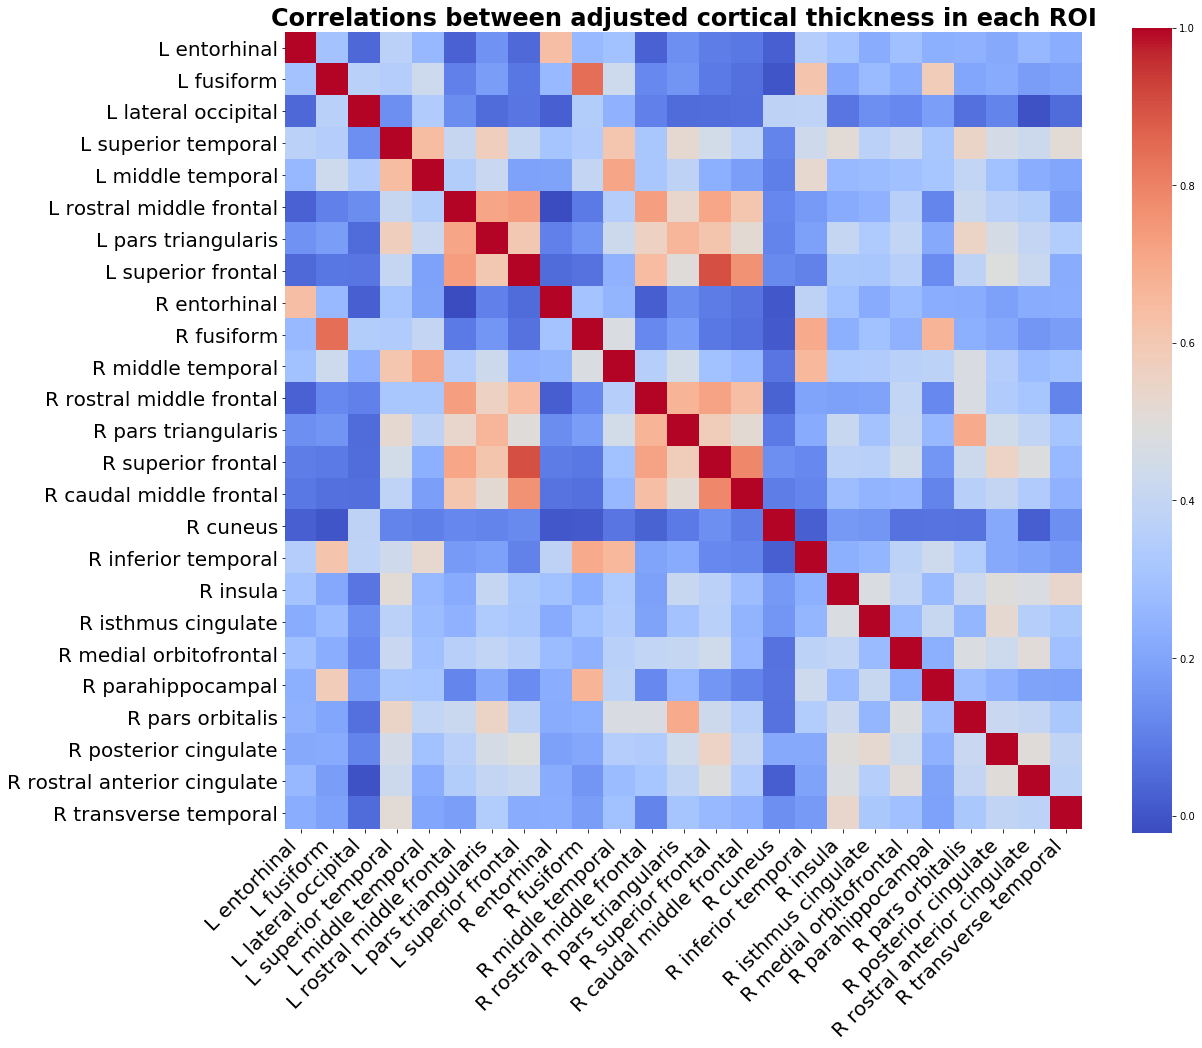

In [17]:
# correlation matrix figure

ticklabels = []

for roi in adj_roi_list:
    temp = str(roi).replace('adj_', '').replace('_', ' ')
    ticklabels.append(temp)

plt.figure(figsize = (18, 18))    
    
corr_plot = sns.heatmap(corrs, 
                        cmap = 'coolwarm', 
                        square = True, 
                        cbar_kws = {'shrink': .7})

corr_plot.set_title('Correlations between adjusted cortical thickness in each ROI', fontsize = 24, weight = 'bold')

corr_plot.set_yticklabels(ticklabels,
                          fontsize = 20)

corr_plot.set_xticklabels(ticklabels, 
                          rotation = 45,
                          horizontalalignment = 'right',
                          fontsize = 20)

corr_plot.figure.tight_layout()
corr_plot.figure.savefig('corr_plot_20190730.png')

Adjusted cortical thickness is highly correlated (r > 0.8) between the L and R fusiform gyri, and between the L and R superior frontal gyri, which is not surprising since these regions are bilateral. Although below our (arbitrary) threshold, some of the frontal regions are also relatively strongly correlated with one another, which again is not surprising since these regions are located within the same lobe of the brain. However, it's not particularly obvious which, if any, of these regions to exclude to mitigate potential problems with collinearity or redundancy.

$~$

In [18]:
# (3) select features are statistically significantly associated with the outcome (Dx group)
# using an ANOVA score test because the data has negative values, which precludes us from using Chi2

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

X = df[adj_roi_list]
y = df['dx_group']

test = SelectKBest(score_func = f_classif, k = 10)
fit = test.fit(X, y)

kbest_scores = pd.concat([pd.Series(adj_roi_list), 
                          pd.Series(fit.scores_),
                          pd.Series(fit.pvalues_)], axis = 1)

kbest_scores.rename(columns = {0: 'ROI', 1: 'ANOVA F-value', 2: 'p-value'}, inplace = True)
kbest_scores.sort_values(by = ['p-value'], ascending = True, inplace = True)

kbest_scores

,ROI,ANOVA F-value,p-value
17,adj_R_insula,7.156777,0.007586
11,adj_R_rostral_middle_frontal,6.318061,0.012103
10,adj_R_middle_temporal,5.428521,0.020002
4,adj_L_middle_temporal,3.674446,0.055528
0,adj_L_entorhinal,2.939521,0.086736
14,adj_R_caudal_middle_frontal,2.698934,0.100720
23,adj_R_rostral_anterior_cingulate,2.337506,0.126598
20,adj_R_parahippocampal,2.293738,0.130203
16,adj_R_inferior_temporal,2.068061,0.150715
21,adj_R_pars_orbitalis,1.910005,0.167261


In [19]:
# there are only 3 features significantly associated with the outcome (p <= 0.5)
# save a list of those features - this will be our second set of features (set of initial 25 is the first)

kbest_list = kbest_scores[kbest_scores['p-value'] <= 0.05]['ROI'].tolist()
kbest_list

['adj_R_insula', 'adj_R_rostral_middle_frontal', 'adj_R_middle_temporal']

$~$

In [20]:
# (4) exclude features with recursive feature elimination using a logistic regression model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df[adj_roi_list]
y = df['dx_group']

lr_model = LogisticRegression(solver = 'lbfgs', random_state = 1)
lr_rfe = RFE(lr_model)
lr_fit = lr_rfe.fit(X, y)
lr_model.fit(X, y)

feature_importance = abs(lr_model.coef_[0])
relative_feature_importance = 100.0 * (feature_importance / feature_importance.max())

features = pd.concat([pd.Series(adj_roi_list), 
                      pd.Series(lr_fit.support_), 
                      pd.Series(lr_fit.ranking_),
                      pd.Series(feature_importance),
                      pd.Series(relative_feature_importance)], axis = 1)

features.rename(columns = {0: 'ROI', 
                           1: 'Support', 
                           2: 'Ranking',
                           3: 'Importance',
                           4: 'Relative Importance'}, inplace = True)

features.sort_values(by = ['Importance'], ascending = False, inplace = True)

features

,ROI,Support,Ranking,Importance,Relative Importance
11,adj_R_rostral_middle_frontal,True,1,0.502963,100.000000
14,adj_R_caudal_middle_frontal,True,1,0.356746,70.928879
9,adj_R_fusiform,True,1,0.237441,47.208506
10,adj_R_middle_temporal,True,1,0.235509,46.824421
12,adj_R_pars_triangularis,True,1,0.224746,44.684431
17,adj_R_insula,True,1,0.218131,43.369175
20,adj_R_parahippocampal,True,1,0.197343,39.236090
21,adj_R_pars_orbitalis,True,1,0.190612,37.897747
0,adj_L_entorhinal,True,1,0.166694,33.142374
24,adj_R_transverse_temporal,True,1,0.155411,30.899066


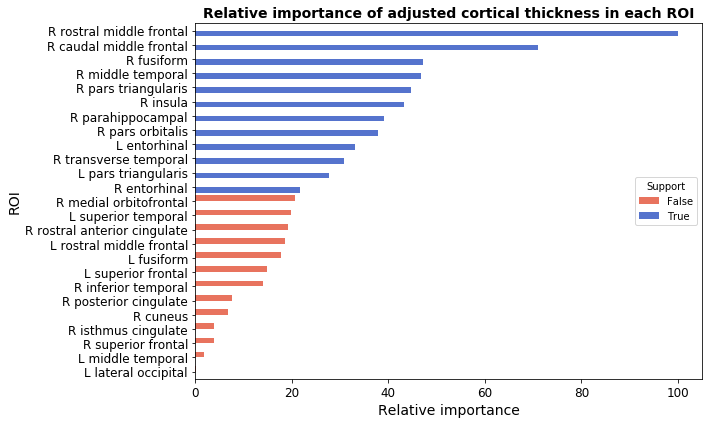

In [21]:
# feature importance bar chart

ticklabels = []

for roi in list(features['ROI']):
    temp = str(roi).replace('adj_', '').replace('_', ' ')
    ticklabels.append(temp)

plt.figure(figsize = (10, 6))       
    
feature_plot = sns.barplot(x = 'Relative Importance', 
                           y = 'ROI', 
                           data = features, 
                           hue = 'Support',
                           palette = ['tomato', 'royalblue'])

feature_plot.set_title('Relative importance of adjusted cortical thickness in each ROI', fontsize = 14, weight = 'bold')

feature_plot.set_xlabel('Relative importance', fontsize = 14)
feature_plot.set_xticklabels(labels = [0, 20, 40, 60, 80, 100], fontsize = 12)

feature_plot.set_ylabel('ROI', fontsize = 14)
feature_plot.set_yticklabels(labels = ticklabels, fontsize = 12)

feature_plot.figure.tight_layout()
feature_plot.figure.savefig('feature_plot_20190730.png')

In [22]:
# save a list of the features not eliminated by recursive feature elimination (those that have ranking = 1)
# this will be our third set of features

rfe_list = features[features['Ranking'] == 1]['ROI'].tolist()
rfe_list

['adj_R_rostral_middle_frontal',
 'adj_R_caudal_middle_frontal',
 'adj_R_fusiform',
 'adj_R_middle_temporal',
 'adj_R_pars_triangularis',
 'adj_R_insula',
 'adj_R_parahippocampal',
 'adj_R_pars_orbitalis',
 'adj_L_entorhinal',
 'adj_R_transverse_temporal',
 'adj_L_pars_triangularis',
 'adj_R_entorhinal']

$~$

**III. Final model selection and cross-validation**  
We can compare how our chosen SVM algorithm performs with the three sets of features we've selected - the original set and the two dimension-reduced sets:  

(1) the initial set of features (all 25 ROIs)  
(2) those that were significantly associated with the outcome (3 ROIs selected through SelectKBest)  
(3) those selected through recursive feature elimination (12 ROIs selected through RFE)  

Notably, the three features in set 2 are also included in set 3

In [23]:
finalmodel_results = pd.DataFrame(columns = ['Feature set',
                                             'N features',
                                             'AUC',
                                             'Sensitivity',
                                             'Specificity',
                                             'Accuracy',
                                             'Cross-validated Acc.'])

In [24]:
finalmodel_results

,Feature set,N features,AUC,Sensitivity,Specificity,Accuracy,Cross-validated Acc.


$~$

In [25]:
# Model 2 (again): SVM with all 25 adjusted ROIs as features
# accuracy and AUC

from sklearn.metrics import roc_curve

X = df[adj_roi_list] 
y = df['dx_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

svm_model = svm.SVC(gamma = 'auto') 
svm_model.fit(X_train, y_train)

y_pred_class_svm = svm_model.predict(X_test)

svm_accuracy = metrics.accuracy_score(y_test, y_pred_class_svm)
svm_auc = metrics.roc_auc_score(y_test, y_pred_class_svm)

In [26]:
# sensitivity and specificity

from sklearn.metrics import roc_curve

svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_true = y_test, y_score = y_pred_class_svm)
svm_sensitivity = svm_tpr[1]
svm_specificity = 1 - svm_fpr[1]

In [27]:
# ten-fold cross-validation

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_val_predict

svm_model.fit(X, y)

kf = KFold(n_splits = 10, random_state = 1, shuffle = False)
svm_scores = cross_val_score(svm_model, X, y, cv = kf)
svm_cv_acc = svm_scores.mean()

In [28]:
finalmodel_results.loc[len(finalmodel_results)] = ['Initial', 
                                                   len(adj_roi_list), 
                                                   svm_auc,
                                                   svm_sensitivity,
                                                   svm_specificity,
                                                   svm_accuracy,
                                                   svm_cv_acc]

$~$

In [29]:
# Model 5: three features significantly associated with the outcome
# accuracy and AUC

X = df[kbest_list]
y = df['dx_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)    
    
kbest_model = svm.SVC(gamma = 'auto') 
kbest_model.fit(X_train, y_train)

y_pred_class_kbest = kbest_model.predict(X_test)

kbest_accuracy = metrics.accuracy_score(y_test, y_pred_class_kbest)
kbest_auc = metrics.roc_auc_score(y_test, y_pred_class_kbest)

In [30]:
# sensitivity and specificity

kbest_fpr, kbest_tpr, kbest_thresholds = roc_curve(y_true = y_test, y_score = y_pred_class_kbest)
kbest_sensitivity = kbest_tpr[1]
kbest_specificity = 1 - kbest_fpr[1]

In [31]:
# ten-fold cross-validation

kbest_model.fit(X, y)

kf = KFold(n_splits = 10, random_state = 1, shuffle = False)
kbest_scores = cross_val_score(kbest_model, X, y, cv = kf)
kbest_cv_acc = kbest_scores.mean()

In [32]:
finalmodel_results.loc[len(finalmodel_results)] = ['Sig. assoc.', 
                                                   len(kbest_list), 
                                                   kbest_auc,
                                                   kbest_sensitivity,
                                                   kbest_specificity,
                                                   kbest_accuracy,
                                                   kbest_cv_acc]

$~$

In [33]:
# Model 6: twelve features selected through RFE
# accuracy and AUC

X = df[rfe_list]
y = df['dx_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)    
    
rfe_model = svm.SVC(gamma = 'auto') 
rfe_model.fit(X_train, y_train)

y_pred_class_rfe = rfe_model.predict(X_test)

rfe_accuracy = metrics.accuracy_score(y_test, y_pred_class_rfe)
rfe_auc = metrics.roc_auc_score(y_test, y_pred_class_rfe)

In [34]:
# sensitivity and specificity

rfe_fpr, rfe_tpr, rfe_thresholds = roc_curve(y_true = y_test, y_score = y_pred_class_rfe)
rfe_sensitivity = rfe_tpr[1]
rfe_specificity = 1 - rfe_fpr[1]

In [35]:
# ten-fold cross-validation

rfe_model.fit(X, y)

kf = KFold(n_splits = 10, random_state = 1, shuffle = False)
rfe_scores = cross_val_score(rfe_model, X, y, cv = kf)
rfe_cv_acc = rfe_scores.mean()

In [36]:
finalmodel_results.loc[len(finalmodel_results)] = ['RFE', 
                                                   len(rfe_list), 
                                                   rfe_auc,
                                                   rfe_sensitivity,
                                                   rfe_specificity,
                                                   rfe_accuracy,
                                                   rfe_cv_acc]

$~$

In [37]:
finalmodel_results

,Feature set,N features,AUC,Sensitivity,Specificity,Accuracy,Cross-validated Acc.
0,Initial,25,0.582850,0.551020,0.614679,0.584541,0.537173
1,Sig. assoc.,3,0.552284,0.581633,0.522936,0.550725,0.525551
2,RFE,12,0.573160,0.540816,0.605505,0.574879,0.539115


All using an SVM algorithm, neither of the two dimension-reduced models performed better than the initial model that included adjusted cortical thickness in all 25 ROIs as predictors, although all three models performed relatively similarly. The model with the original set of features had the highest AUC, specificity, and classification accuracy for observations in the test dataset. However, following ten-fold cross-validation, the accuracy of the model decreased from 58.45% to 53.71%, which suggests that the model may be overfit. Although the model containing only the features selected through recursive feature elimination had a slightly higher cross-validated accuracy score than did the max model (53.91% compared to 53.72%), this difference is relatively insignificant.  

Thus overall, the maximum model using SVM containing adjusted cortical thickness appears to be the best classification model. However, the model's performance was ultimately still very poor. We can conclude that the model is not capable of classifying ASD from TD

$~$

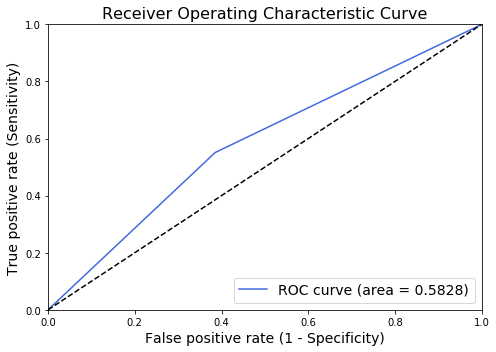

In [38]:
# Plot ROC curve for the final model (the original SVM model containing all 25 ROIs)
# code adapted from https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python

plt.figure(figsize = (7, 5))   
plt.plot(svm_fpr, svm_tpr, label = 'ROC curve (area = %0.4f)' % svm_auc, color = 'royalblue')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate (1 - Specificity)', fontsize = 14)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 14)
plt.title('Receiver Operating Characteristic Curve', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 14)
plt.tight_layout()
plt.savefig('final_model_roc_20190801.png')